In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv('players_22.csv')

/Users/jinyoung/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
df = df.dropna(subset=features)

In [6]:
data = df[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


1. Scale the data
2. Initialize random centroids
3. Label each data point
4. Update Centroid
5. Repeat steps 3 and 4 until centroids stop changing

In [8]:
# 1 to 10 scaling
data = ((data - data.min()) / (data.max() - data.min()))* 9 + 1

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [16]:
def random_centroids(data, k):
    centroids = [] 
    for i in range(k):
        centroid = data.apply(lambda x : float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)        

In [40]:
centroids = random_centroids(data, 5)

In [45]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [46]:
labels = get_labels(data, centroids)

In [47]:
labels

0        0
1        0
2        0
3        0
4        0
        ..
19234    3
19235    3
19236    3
19237    3
19238    3
Length: 19165, dtype: int64

In [48]:
labels.value_counts()

1    4890
4    4860
0    3596
3    3118
2    2701
dtype: int64

In [52]:
def new_centroids(data, labels, k):
    return data.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T

In [53]:
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
from IPython.display import clear_output

In [54]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c = labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], )
    plt.show()

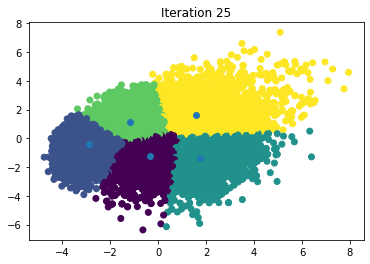

In [56]:
max_iterations = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1 

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [57]:
centroids

,0,1,2,3,4
overall,4.165832,2.499769,5.252329,4.282221,6.416519
potential,4.188846,4.407333,4.869339,5.963503,6.687419
wage_eur,1.054652,1.015962,1.170918,1.072309,1.646887
value_eur,1.032190,1.013389,1.056035,1.063332,1.421660
age,4.436283,2.307619,6.153689,2.575851,4.091485


In [60]:
df[labels==0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
4812,Y. Benzia,70,71,4000.0,1900000.0,26
4838,L. Đorđević,70,71,8000.0,1900000.0,26
4851,J. Lowe,70,70,20000.0,1800000.0,26
4868,S. van Beek,70,70,6000.0,1500000.0,26
4967,H. Fertoli,70,70,11000.0,1700000.0,26
...,...,...,...,...,...,...
18971,Lalkhawpuimawia,51,51,500.0,60000.0,29
19032,Song Yue,50,50,2000.0,40000.0,29
19100,J. Russell,49,49,500.0,15000.0,36
19118,Gao Xiang,49,49,2000.0,35000.0,32


In [61]:
df[labels==1][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
12250,D. Ferdiz,63,63,500.0,500000.0,21
13640,Dêniro Prestes,62,62,2000.0,475000.0,21
13641,Raullino Meneses,62,62,2000.0,425000.0,21
14331,T. Dombrowa,62,67,500.0,600000.0,21
14366,Lucas Esteves,62,67,1000.0,575000.0,21
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [62]:
from sklearn.cluster import KMeans

In [63]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [64]:
centroids = kmeans.cluster_centers_

In [65]:
pd.DataFrame(centroids, columns=features).T

,0,1,2
overall,4.803121,3.599504,6.231246
potential,4.505849,5.204740,6.624633
wage_eur,1.113215,1.039939,1.657303
value_eur,1.040096,1.035779,1.413984
age,5.610089,2.713174,4.138216
